In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


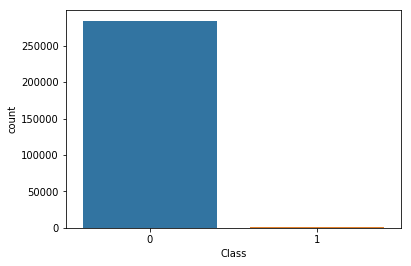

In [3]:
#Let us see target Class distribution
sns.countplot(x=data.Class, data= data)

In [4]:
#totally skewed or imbalanced. Lets check the number of rows to decide on resampling.
data.shape

(284807, 31)

In [5]:
data.drop(columns = 'Time',inplace = True)

In [6]:
#Trying undersampling as amount of data is too much

#taking count of rows that are fraudulant
no_frauds = len(data[data.Class == 1])

In [7]:
no_frauds

492

In [8]:
#Taking number of Non fraudulant indicies
non_fraud_indices = data[data.Class == 0].index

In [9]:
#taking 492 rows by indices randomly
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)

In [10]:
#take indies of fraudulant data
fraud_indices = data[data.Class == 1].index

In [11]:
#take a combination of 492 Fradulant and 492 non Fraudulant data
under_sample_indices = np.concatenate([fraud_indices,random_indices])

In [12]:
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [13]:
under_sample = data.loc[under_sample_indices]

In [14]:
## Splitting the data 80, 20 ratio for training and test 
from sklearn.model_selection import train_test_split

X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.2, random_state = 0)

In [15]:
#trying Logistic regression
from sklearn.linear_model import LogisticRegression

lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Calulate the R , accuracy and recall scores and check via cross validation

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


print("Training Score: ", lr_under.score(X_under_train,y_under_train))
print("Test Score: ", lr_under.score(X_under_test,y_under_test))
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))
cross_val_score(lr_under, X_under_test, y_under_test, cv=5)

Training Score:  0.9504447268106735
Test Score:  0.9390862944162437
0.945054945054945
0.9390862944162437


c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

array([0.90243902, 0.92307692, 0.97435897, 0.94871795, 0.94871795])

In [17]:
## That was good, now lets try to apply the same model to original data and then predict

X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [18]:
y_pred = lr_under.predict(X_test)

In [19]:
print("Training Score: ", lr_under.score(X_train,y_train))
print("Test Score: ", lr_under.score(X_test,y_test))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
cross_val_score(lr_under, X_train, y_train, cv=5)

Training Score:  0.9665737672540543
Test Score:  0.9660475404655735
0.9603960396039604
0.9660475404655735


c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

array([0.99907834, 0.99923193, 0.99920999, 0.99927582, 0.99912219])

In [20]:
#Scores were good but looks like cross validation appears to be too good to be true.

#Trying weighted logistic regression om original data and checking all scores again

lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)
y_balanced_pred = lr_balanced.predict(X_test)
print(recall_score(y_test,y_balanced_pred))
print(accuracy_score(y_test,y_balanced_pred))
cross_val_score(lr_balanced, X_test, y_test, cv=5)

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9306930693069307
0.9762473227765879


c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

array([0.98551869, 0.97744031, 0.97164677, 0.98139045, 0.97998596])

## Conclusion:

Looks like Logistic Regression with under sampling or the weighted balance method can be the answer when we have such imbalanced dataset. As we can see, though I have used undersampling, I had made sure to check that on original data as well to make sure we are not missing any important information and also used cross validation to recheck our results. On an average we see that the score is 95% despite of the method we use.